# U.S. Medical Insurance Costs

## Project Scoping
### Goals:
- Find out which factors in our dataset are the biggest determinants of insurance cost.
- Find out which factors are negatively correlated with insurance cost (which make costs go down) and positively correlated.
### Hypotheses:
- Factors that increase insurance costs: smoking, higher age, higher BMI, being Female
- Smoking is the biggest determinant of insurance cost (has the most influence over insurance cost)
### Questions:
- Do certain regions pay more for insurance than others?
### Steps in process:
1. Read in data
2. EDA and data cleaning:
    1. missing values?
    2. correct data types?
    3. descriptive stats
    4. identify outliers
    5. visualize data with histograms, box plots, correlation plots
3. Feature engineering
    1. convert categorical variables to numbers
    2. consider bucketing some features (BMI = underweight, normal, overweight, obese)
4. Split data into testing and training sets
5. Test several supervised learning algorithms to find the best performance
6. Draw conclusions

## Step 1: import packages, read in data

In [17]:
#import packages
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [21]:
#read data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: EDA and data cleaning:
- missing values?
- correct data types?
- descriptive stats
- identify outliers
- visualize data with histograms, box plots, correlation plots

In [27]:
#describe numeric features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**age:**: mean and median are close, indicating that there probably aren't outliers skewing this feature; ages range from 18 to 64

**bmi**: mean and median are also close for this feature; BMIs range from ~16 to ~53

**children**: mean and median are close; range is 1-5 children

**charges**: the mean is much greater than the median, indicating that this feature is likely skewed to the high side; the range is also large, ~1,100 to ~64,000

In [33]:
#check for NaNs
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
#check data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

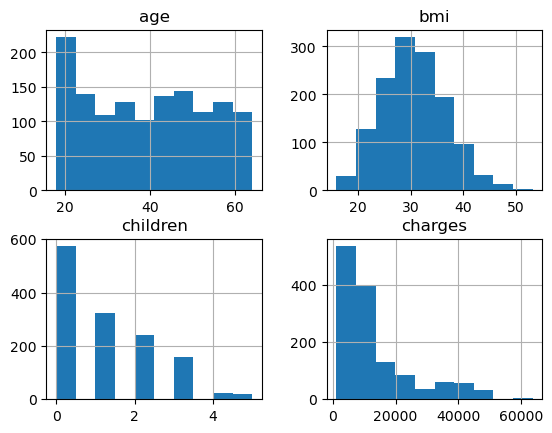

In [43]:
histograms = df.hist()

**age**: most ages are in the 20s

**bmi**: looks mostly normally distributed

**charges**: majorly skewed right; most values are 0-10,000, but there are values in the 40,000s, and at least one as high as 60,000

In [49]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


The sex and region features seem to have similar count for each category; smoker has many more non-smokers than smokers

<Axes: >

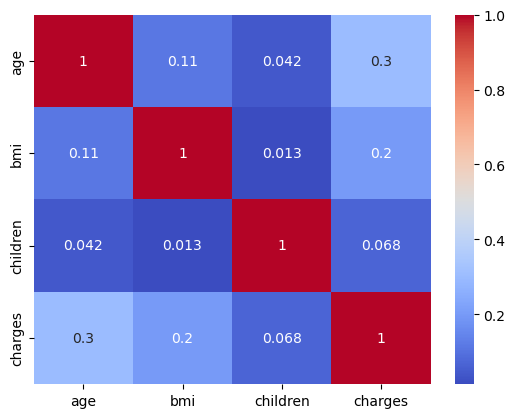

In [62]:
#check correlations between numberical variables
corr_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

There are no strong correlations in our data among numerical varibles, but age and charges are the most correlated

## Step 3: Feature engineering
- convert categorical variables to numbers
- consider bucketing some features (BMI = underweight, normal, overweight, obese)

In [75]:
#add BMI categories following:
#Underweight: BMI is less than 18.5
#Normal weight: BMI is 18.5 to 24.9
#Overweight: BMI is 25 to 29.9
#Obese: BMI is 30 or more
def BMI_thresholds(bmi):
    if bmi < 18.5:
        #underweight
        return 'underweight'
    elif bmi < 24.9:
        #normal
        return 'normal'
    elif bmi < 29.9:
        #overweight
        return 'overweight'
    else:
        #obese
        return 'obese'
df['bmi_category'] = df['bmi'].apply(BMI_thresholds)
#df.head()

#convert categoricael to dummies
df_dummies = pd.get_dummies(df[['sex', 'smoker', 'region', 'bmi_category']], dtype=int)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,1,0,0,1,0,0,0,1,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,obese,0,1,1,0,0,0,1,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,obese,0,1,1,0,0,0,1,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,normal,0,1,1,0,0,1,0,0,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,overweight,0,1,1,0,0,1,0,0,0,0,1,0


## Step 4: Split data into testing and training sets

## Step 5: Test several supervised learning algorithms to find the best performance

## Draw conclusions